# Background
This is a script I wrote to explore the results of a survey I created (https://tinyurl.com/dating-survey). I ended up receiving over 500 responses from individuals all over the world/web and some fascinating comments. Each row tells someone's story. For this script, I was most interested in looking at "burnt out of dating" and "burnt out of apps" in relation to other characteristics of the person. This data is biased toward groups of the 500 people, so this analysis is more done to quantitatively understand the set of people I ended up surveying rather than make statistically significant conjectures about a broader population of people. 

# Imports

In [1]:
import pandas as pd
import pandas_profiling
import requests
import matplotlib
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:
!pip install pandas_profiling

     |████████████████████████████████| 194kB 229kB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 472kB/s eta 0:00:01
     |████████████████████████████████| 10.2MB 125kB/s eta 0:00:01
     |████████████████████████████████| 133kB 630kB/s eta 0:00:01
     |████████████████████████████████| 614kB 693kB/s eta 0:00:01
     |████████████████████████████████| 8.3MB 632kB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 107kB/s eta 0:00:01
     |████████████████████████████████| 61kB 142kB/s eta 0:00:01
     |████████████████████████████████| 61kB 637kB/s eta 0:00:01
     |████████████████████████████████| 122kB 76kB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 62kB/s eta 0:00:012
     |████████████████████████████████| 2.0MB 178kB/s eta 0:00:01
     |████████████████████████████████| 296kB 429kB/s eta 0:00:01
     |████████████████████████████████| 235kB 683kB/s eta 0:00:01
     |████████████████████████████████| 122kB 332kB/s eta 0:00:01


     |████████████████████████████████| 2.2MB 284kB/s eta 0:00:01
     |████████████████████████████████| 15.9MB 331kB/s eta 0:00:01
     |████████████████████████████████| 51kB 667kB/s eta 0:00:01
     |████████████████████████████████| 92kB 639kB/s eta 0:00:01
     |████████████████████████████████| 81kB 155kB/s eta 0:00:01


ERROR: csvmatch 1.19 has requirement tqdm==4.18.0, but you'll have tqdm 4.42.0 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
  Running setup.py install for confuse ... done
  Found existing installation: Jinja2 2.10.1
    Uninstalling Jinja2-2.10.1:
      Successfully uninstalled Jinja2-2.10.1
  Running setup.py install for tangled-up-in-unicode ... done
  Running setup.py install for attr ... done
  Running setup.py install for visions ... done
  Running setup.py install for htmlmin ... done
  Found existing installation: joblib 0.13.2
    Uninstalling joblib-0.13.2:
      Successfully uninstalled joblib-0.13.2
  Found existing installation: tqdm 4.18.0
    Uninstalling tqdm-4.18.0:
      Successfully uninstalled tqdm-4.18.0
  Found existing installation: urllib3 1.25.3
   

# Read in Data, rename columns

In [2]:
#load in the dataframe
df=pd.read_csv('datingappbehavior.csv')

In [3]:
original_columns=df.columns

In [4]:
df.columns

Index(['Timestamp',
       'Have you used a dating app or online dating site before? ',
       'How many of your friends use or have used dating apps or online dating?',
       'Have you been on a date with someone you are not in a committed relationship with in the last month ?',
       'If yes, how did you meet this person? (check all that apply)',
       'how_meet_cleaned',
       'If you were single, how would you meet people you wanted to date? (check all that apply)',
       'how_want_meet_cleaned', 'Have you ever felt burnt out of dating?',
       'Why or Why not?', 'Have you used dating apps in the last month?',
       'Given your answer to the previous question, please tell me why or why not!',
       'On average, how frequently do you use dating apps/online date now?',
       'How has your dating app/online dating app usage changed in the last year?',
       'If your usage has changed, why?',
       'Have you ever felt "burnt out" of dating apps/online dating?',
       'Have 

In [5]:
df.columns=['timestamp','used_app_or_site','friends_usage','date_past_month','yes_date_how','how_meet_cleaned',\
            'how_want_meet','how_want_meet_cleaned','burnt_out_dating','burntout_why',\
            'used_apps_month','why_app_usage','usage_frequency','usage_change','usage_change_reason',\
            'burnt_out_apps','app_relationship','age','home_origin','home_residence','gender','sexuality',\
            'race_census','race_identity','comments']

In [6]:
#new columns
df.columns

Index(['timestamp', 'used_app_or_site', 'friends_usage', 'date_past_month',
       'yes_date_how', 'how_meet_cleaned', 'how_want_meet',
       'how_want_meet_cleaned', 'burnt_out_dating', 'burntout_why',
       'used_apps_month', 'why_app_usage', 'usage_frequency', 'usage_change',
       'usage_change_reason', 'burnt_out_apps', 'app_relationship', 'age',
       'home_origin', 'home_residence', 'gender', 'sexuality', 'race_census',
       'race_identity', 'comments'],
      dtype='object')

# Explore Data

In [7]:
df.describe()

,age
count,463.000000
mean,25.576674
std,4.894344
min,16.000000
25%,23.000000
50%,25.000000
75%,27.000000
max,61.000000


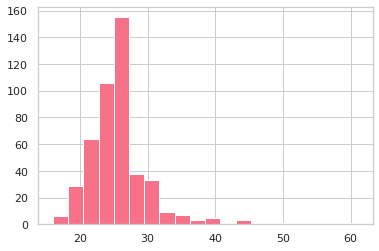

In [8]:
df.age.hist(bins=20)

In [9]:
#gender percentage
df.gender.value_counts(normalize=True)

Female        0.505308
Male          0.422505
Non-Binary    0.072187
Name: gender, dtype: float64

In [10]:
#sexuality percentage
df.sexuality.value_counts(normalize=True)

Heterosexual                                                                                                                                             0.623126
Bisexual                                                                                                                                                 0.244111
Homosexual                                                                                                                                               0.096360
Heteroflexible                                                                                                                                           0.008565
Figuring it out I think                                                                                                                                  0.002141
Queer                                                                                                                                                    0.002141
*no labels, all love        

In [36]:
#run value_counts() for all columns and I'll also make a list of columns I want to analyze
lr_columns=[]
for column in df.columns:
    if column in ['timestamp','yes_date_how','how_want_meet_cleaned','how_want_meet','how_meet_cleaned','burntout_why',\
                  'why_app_usage','usage_change_reason','home_origin','home_residence','race_identity',\
                  'comments']:
        pass
    else:
        print(column)
        lr_columns.append(column)
        print(df[f'{column}'].value_counts())
        print('-------------------------------')

used_app_or_site
Yes--Dating App Only                     281
Yes--Both Dating App and Online Sites    124
No                                        63
Yes--Online Site Only                      8
Name: used_app_or_site, dtype: int64
-------------------------------
friends_usage
Most           313
Some           153
Almost None     10
Name: friends_usage, dtype: int64
-------------------------------
date_past_month
No     300
Yes    176
Name: date_past_month, dtype: int64
-------------------------------
burnt_out_dating
Yes    328
No     145
Name: burnt_out_dating, dtype: int64
-------------------------------
used_apps_month
Yes    223
No     215
Name: used_apps_month, dtype: int64
-------------------------------
usage_frequency
Never                 110
A few times a week    100
Daily                  56
Very rarely            49
Every few weeks        45
Almost never           38
Multiple times/day     28
Name: usage_frequency, dtype: int64
-------------------------------
usage_chang

In [37]:
#make dataframe
lr_df=df[lr_columns]
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
used_app_or_site    476 non-null object
friends_usage       476 non-null object
date_past_month     476 non-null object
burnt_out_dating    473 non-null object
used_apps_month     438 non-null object
usage_frequency     426 non-null object
usage_change        421 non-null object
burnt_out_apps      419 non-null object
app_relationship    261 non-null object
age                 463 non-null float64
gender              471 non-null object
sexuality           467 non-null object
race_census         464 non-null object
dtypes: float64(1), object(12)
memory usage: 48.5+ KB


In [38]:
#replace all fields of yes and no with 0 and 1
lr_df.used_app_or_site=lr_df.used_app_or_site.str.replace('No','None')
lr_df=lr_df.replace({
    'Yes': 1,
    'No': 0
})
lr_df.burnt_out_dating.value_counts()

1.0    328
0.0    145
Name: burnt_out_dating, dtype: int64

In [20]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
used_app_or_site    476 non-null object
friends_usage       476 non-null object
date_past_month     476 non-null int64
burnt_out_dating    473 non-null float64
used_apps_month     438 non-null float64
usage_frequency     426 non-null object
usage_change        421 non-null object
burnt_out_apps      419 non-null object
app_relationship    261 non-null float64
age                 463 non-null float64
gender              471 non-null object
sexuality           467 non-null object
race_census         464 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 48.5+ KB


In [ ]:
#I should maybe make some age buckets to understand the impact of age groups

In [39]:
lr_df.used_app_or_site.value_counts()

Yes--Dating App Only                     281
Yes--Both Dating App and Online Sites    124
None                                      63
Yes--Online Site Only                      8
Name: used_app_or_site, dtype: int64

# Burnt Out of Dating Model

In [28]:
#need dummy variables for categorical data: used_app_or_site, friends_usage, usage_frequency, usage_change, gender, sexuality, race_census

In [51]:

model = smf.logit("""
    burnt_out_dating ~ age
""", data=lr_df)

result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.615739
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       burnt_out_dating   No. Observations:                  461
Model:                          Logit   Df Residuals:                      459
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Feb 2020   Pseudo R-squ.:               1.038e-05
Time:                        21:03:04   Log-Likelihood:                -283.86
converged:                       True   LL-Null:                       -283.86
Covariance Type:            nonrobust   LLR p-value:                    0.9388
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8600      0.536      1.605      0.109      -0.190       1.910
age           -0.0016      0.021     -0.077      0.939      -0.042       0.039
==============================================================================
"""

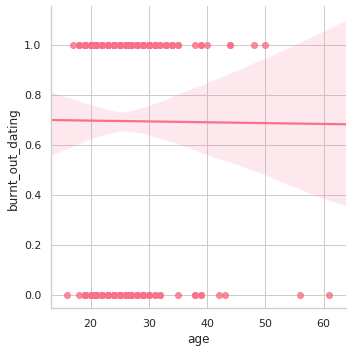

In [54]:
lr_df[['age','burnt_out_dating']].burnt_out

/home/lliukrason/miniconda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

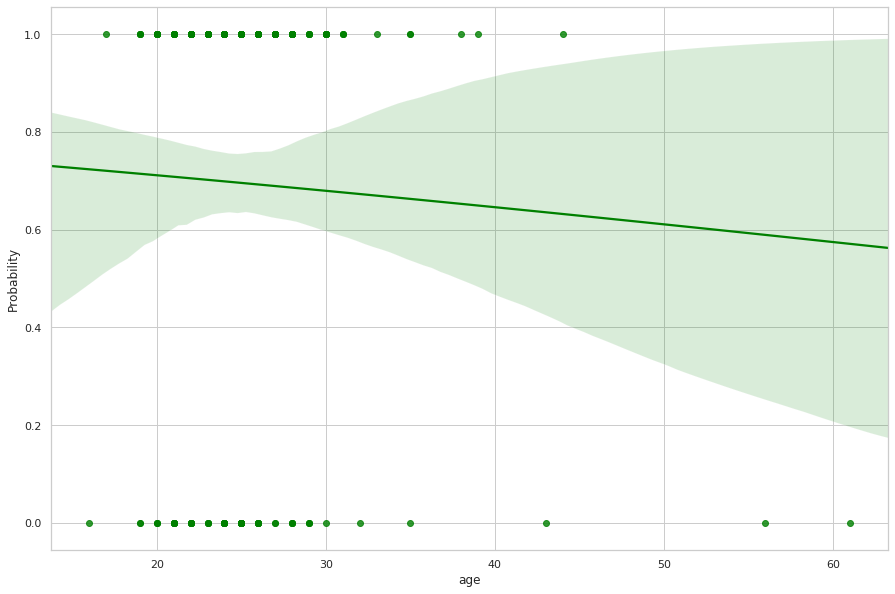

In [69]:
#Build and visualize a simple logistic regression between age and burnt out

lr_df1=lr_df.copy()
lr_dr1=lr_df1.dropna()
ap_X = lr_dr1[['age']].values 
ap_y = lr_dr1['burnt_out_dating'].values
ap_lr = LogisticRegression()
ap_lr.fit(ap_X, ap_y)

def ap_log_regplot(ap_X, ap_y):
    plt.figure(figsize=(15,10))
    sns.regplot(ap_X, ap_y, logistic=True, color='green',dropna=True)
    return None

ap_log_regplot(ap_X, ap_y)
plt.xlabel('age')
plt.ylabel('Probability')
plt.show

In [42]:
#not a very strong visible relationship between burn-out and age
#turns out 10+ features and 500 rows, you may get a "perfect separation", making the p value hard to compute
#the p value is a signal for significance so it would be good to have it 
model = smf.logit("""
    burnt_out_dating ~ 
        + C(used_app_or_site, Treatment('Yes--Dating App Only'))
        + friends_usage
        + date_past_month
        + used_apps_month
        + burnt_out_apps
        + app_relationship
        + age
        + C(friends_usage, Treatment('Most'))
        + C(usage_frequency, Treatment('Never'))
        + C(usage_change, Treatment('Stayed the Same'))
        + C(gender, Treatment('Female'))
        + C(sexuality, Treatment('Heterosexual'))
        + C(race_census, Treatment('White'))

""", data=lr_df)

result = model.fit(method='bfgs')
print(result.summary())

         Current function value: 0.392670
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:       burnt_out_dating   No. Observations:                  229
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                           33
Date:                Fri, 21 Feb 2020   Pseudo R-squ.:                  0.3621
Time:                        20:00:42   Log-Likelihood:                -89.921
converged:                      False   LL-Null:                       -140.97
Covariance Type:            nonrobust   LLR p-value:                 5.497e-09
                                                                                                                                                                                                       coef    std err          z      P>|

/home/lliukrason/miniconda/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/lliukrason/miniconda/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/lliukrason/miniconda/envs/py37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/lliukrason/miniconda/envs/py37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/lliukrason/miniconda/envs/py37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & 

In [43]:
#grabbing the odds ratio
feature_names = result.params.index
coefficients = result.params.values

coefs = pd.DataFrame({
    'coef': coefficients,
    'odds ratio': np.exp(result.params.values),
    'pvalue': result.pvalues
}).sort_values(by='odds ratio', ascending=False)
coefs

,coef,odds ratio,pvalue
"burnt_out_apps[T.Yes, currently]",4.071468,58.642994,NaN
"burnt_out_apps[T.Yes, before but not currently]",2.901398,18.199576,NaN
"C(usage_frequency, Treatment('Never'))[T.Multiple times/day]",1.546021,4.692763,NaN
"C(race_census, Treatment('White'))[T.Two or more races]",1.416923,4.124408,NaN
"C(sexuality, Treatment('Heterosexual'))[T.Heteroflexible]",0.966112,2.627709,NaN
friends_usage[T.Most],0.643962,1.904009,NaN
date_past_month,0.618469,1.856084,NaN
app_relationship,0.393626,1.482346,NaN
"C(sexuality, Treatment('Heterosexual'))[T.bicurious/maybe greedy, otherwise, I'd be straight]",0.326430,1.386011,NaN
"C(sexuality, Treatment('Heterosexual'))[T.queer, generally, but not really identifying as such, usually date chicks but sometimes dudes]",0.239396,1.270482,NaN


In [47]:
#rename columns for more clarity:
# Copy the names to a pd.Series for easy search/replace
# We'll also keep a safe copy to make double-checking easy later
names = pd.Series(model.data.xnames)
originals = list(names.copy())

# Reformat C(usage_frequency, Treatment('Never'))[T.Multiple times/day] as 'Multiple times/day'
names = names.str.replace(r", ?Treatment\(.*\)", r"")
names = names.str.replace(r"C\(([\w]+)", r"\1_")
names = names.str.replace(r"\[T.(.*)\]", r"\1")

original_names = model.data.xnames
# Assign back into the model for display
model.data.xnames = list(names)


In [46]:
#grabbing the odds ratio and sorting by importance for "burnt out of dating"
#It makes sense that If you are burnt out of dating apps (currently), you're more likely to be burnt out of dating
feature_names = result.params.index
coefficients = result.params.values

coefs = pd.DataFrame({
    'coef': coefficients,
    'odds ratio': np.exp(result.params.values),
    'pvalue': result.pvalues
}).sort_values(by='odds ratio', ascending=False)
coefs

,coef,odds ratio,pvalue
"burnt_out_appsYes, currently",4.071468,58.642994,NaN
"burnt_out_appsYes, before but not currently",2.901398,18.199576,NaN
usage_frequency_Multiple times/day,1.546021,4.692763,NaN
race_census_Two or more races,1.416923,4.124408,NaN
sexuality_Heteroflexible,0.966112,2.627709,NaN
friends_usageMost,0.643962,1.904009,NaN
date_past_month,0.618469,1.856084,NaN
app_relationship,0.393626,1.482346,NaN
"sexuality_bicurious/maybe greedy, otherwise, I'd be straight",0.326430,1.386011,NaN
"sexuality_queer, generally, but not really identifying as such, usually date chicks but sometimes dudes",0.239396,1.270482,NaN
